# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [2]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

__A:__

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__

In [3]:
seed(47)
# draw five samples here
np.random.seed(47)

# Generate five random samples from the standard normal distribution
samples = norm.rvs(size=5)

print("Five samples from the standard normal distribution:")
print(samples)


Five samples from the standard normal distribution:
[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__

In [5]:
# Calculate and print the mean here, hint: use np.mean()
mean = np.mean(samples)
print(mean)

0.19355593334131074


__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [7]:
std_dev = np.sqrt(np.sum((samples - mean)**2) / len(samples))
print(std_dev)


0.9606195639478641


Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [8]:
std_dev_2 = np.sqrt(np.sum((samples - mean)**2) / (len(samples) - 1))
print(std_dev_2)


1.0740053227518152


__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [9]:
std_dev_numpy = np.std(samples)
print(std_dev_numpy)

0.9606195639478641


__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [10]:
std_dev_population = np.std(samples, ddof=1)  # ddof=1 for Bessel's correction
print(std_dev_population)

1.0740053227518152


### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [11]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

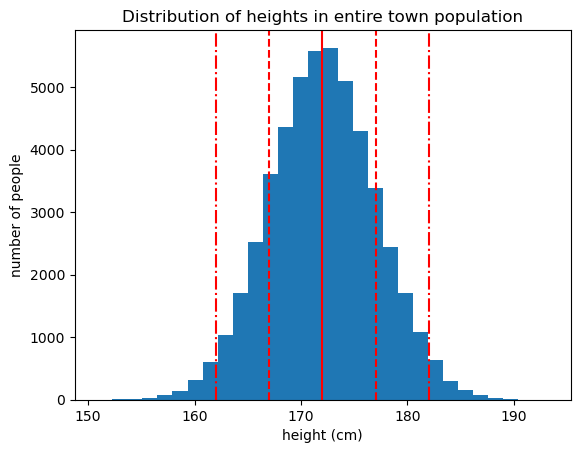

In [12]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [13]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [14]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

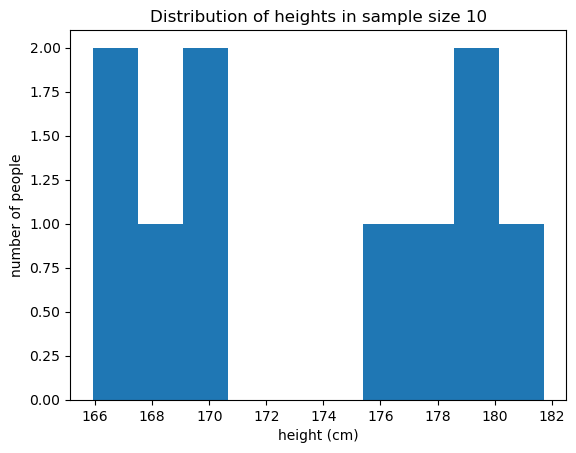

In [15]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [9]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [10]:
daily_sample2 = townsfolk_sampler(10)

In [11]:
np.mean(daily_sample2)

173.7317666636263

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

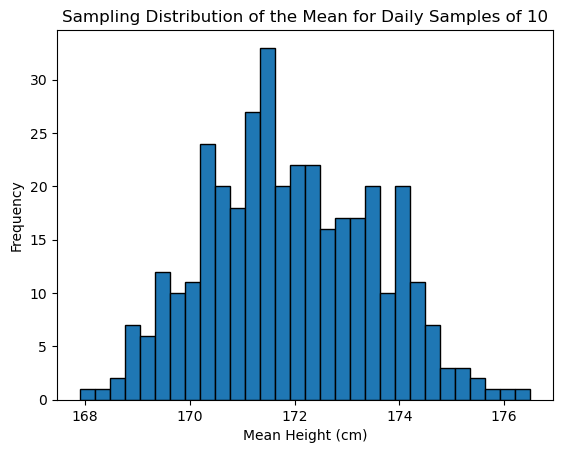

In [16]:
pop_heights = np.random.normal(172, 5, size=50000)
def daily_trial(sample_size):
    return np.mean(np.random.choice(pop_heights, sample_size))
days_in_year = 365

# Perform the daily trial for a year
daily_means = [daily_trial(10) for _ in range(days_in_year)]

plt.hist(daily_means, bins=30, edgecolor='black')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean for Daily Samples of 10')
plt.show()

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

__A:__

In [17]:
# Calculate the expected mean and standard deviation based on the CLT
expected_mean_sample = np.mean(daily_means)
expected_std_sample = np.std(daily_means)

# Calculate the standard error using the formula: sigma / sqrt(n)
population_std = 5  # Given population standard deviation
sample_size = 10
expected_std_error = population_std / np.sqrt(sample_size)

# Print the results
print(f"Expected Mean of Sample Mean: {expected_mean_sample}")
print(f"Expected Standard Deviation of Sample Mean: {expected_std_sample}")
print(f"Expected Standard Error based on CLT: {expected_std_error}")

Expected Mean of Sample Mean: 171.90503369575725
Expected Standard Deviation of Sample Mean: 1.6016682752758709
Expected Standard Error based on CLT: 1.5811388300841895


Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

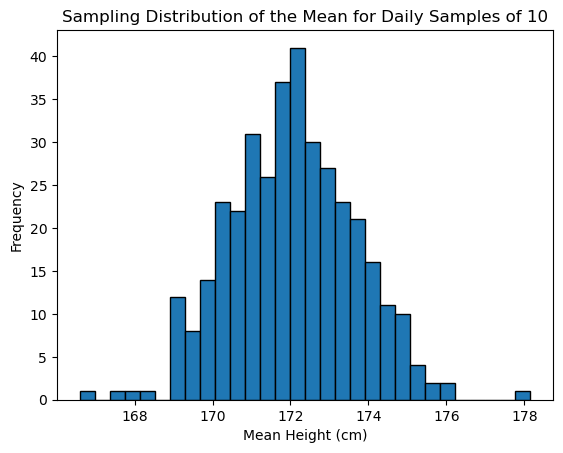

In [18]:
# Set a random seed for reproducibility
np.random.seed(47)

# Simulate the distribution of heights in the entire town population
pop_heights = np.random.normal(172, 5, size=50000)

# Function to perform the daily trial and calculate the mean of each daily sample
def daily_trial(sample_size):
    return np.mean(np.random.choice(pop_heights, sample_size))

# Number of days in a year
days_in_year = 365

# Perform the daily trial for a year
daily_means = [daily_trial(10) for _ in range(days_in_year)]

# Plot the sampling distribution of the mean
plt.hist(daily_means, bins=30, edgecolor='black')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean for Daily Samples of 10')
plt.show()

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

In [19]:
# Calculate the probability of observing a value of 1 or less in the standard normal distribution
probability_1_or_less = norm.cdf(1)

# Print the result
print(f"Probability of observing a value of 1 or less: {probability_1_or_less:.4f}")

Probability of observing a value of 1 or less: 0.8413


Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [20]:
# Calculate the probability of observing a value of 1 or less in the standard normal distribution
probability_1_or_less_cdf = norm.cdf(1)

# Print the result
print(f"Probability of observing a value of 1 or less using cdf(): {probability_1_or_less_cdf:.4f}")

Probability of observing a value of 1 or less using cdf(): 0.8413


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

In [22]:
# Population parameters
population_mean = 172
population_std = 5

# Value
x = 177

# Calculate z-score
z_score = (x - population_mean) / population_std

# Print the z-score
print(f"Z-Score for x = 177 cm: {z_score:.4f}")

# Calculate the probability using CDF
probability_177_or_less = norm.cdf(177, loc=population_mean, scale=population_std)

# Print the result
print(f"Probability of height being 177 cm or less using CDF: {probability_177_or_less:.4f}")

Z-Score for x = 177 cm: 1.0000
Probability of height being 177 cm or less using CDF: 0.8413


__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

__A:__

In [23]:
# Given value
height_observed = 200  # 2.00 m

# Calculate z-score
z_score_observed = (height_observed - population_mean) / population_std

# Calculate the probability using CDF
probability_at_least_as_extreme = 1 - norm.cdf(height_observed, loc=population_mean, scale=population_std)

# Print the results
print(f"Z-Score for observed height of 2.00 m: {z_score_observed:.4f}")
print(f"Probability of obtaining a value at least as extreme as 2.00 m: {probability_at_least_as_extreme:.4f}")

Z-Score for observed height of 2.00 m: 5.6000
Probability of obtaining a value at least as extreme as 2.00 m: 0.0000


What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__

In [24]:
# Set a random seed for reproducibility
np.random.seed(47)

# Randomly sample the heights of 50 townsfolk
sample_size = 50
sample_heights = np.random.choice(pop_heights, sample_size)

# Estimate the population mean and standard deviation
sample_mean = np.mean(sample_heights)
sample_std = np.std(sample_heights, ddof=1)  # Use ddof=1 for sample standard deviation

# Set the confidence level
confidence_level = 0.95

# Calculate the critical z-value for the confidence interval
critical_z = norm.ppf((1 + confidence_level) / 2)

# Calculate the margin of error
margin_of_error = critical_z * (sample_std / np.sqrt(sample_size))

# Calculate the 95% confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"Critical Z-Value: {critical_z:.2f}")
print(f"Margin of Error: {margin_of_error:.2f}")
print(f"95% Confidence Interval: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Check if the true population mean (172 cm) is within the confidence interval
true_population_mean = 172
contains_true_population_mean = confidence_interval[0] <= true_population_mean <= confidence_interval[1]

print(f"Does the interval include the true population mean? {'Yes' if contains_true_population_mean else 'No'}")

Sample Mean: 172.78
Sample Standard Deviation: 4.20
Critical Z-Value: 1.96
Margin of Error: 1.16
95% Confidence Interval: (171.62, 173.94)
Does the interval include the true population mean? Yes


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

In [26]:
#The problem with using the critical z-value for calculating a confidence interval is that it assumes knowledge
#of the population standard deviation, which is often unknown. In practice, when using the sample standard deviation
#, it's more appropriate to use the t-distribution and its critical values to account for the uncertainty introduced 
#by estimating the standard deviation from the sample.

__A:__

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [27]:
# Calculate the critical t-value for a 95% confidence interval
degrees_of_freedom = sample_size - 1
critical_t = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error using the t-distribution
margin_of_error_t = critical_t * (sample_std / np.sqrt(sample_size))

# Calculate the 95% confidence interval using the t-distribution
confidence_interval_t = (sample_mean - margin_of_error_t, sample_mean + margin_of_error_t)

# Print the results
print(f"Critical t-Value: {critical_t:.2f}")
print(f"Margin of Error (t-distribution): {margin_of_error_t:.2f}")
print(f"95% Confidence Interval (t-distribution): ({confidence_interval_t[0]:.2f}, {confidence_interval_t[1]:.2f})")

Critical t-Value: 2.01
Margin of Error (t-distribution): 1.19
95% Confidence Interval (t-distribution): (171.59, 173.97)


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals

# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('/Users/kachu/Downloads/archive-2/insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [9]:
medical.info()
medical.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

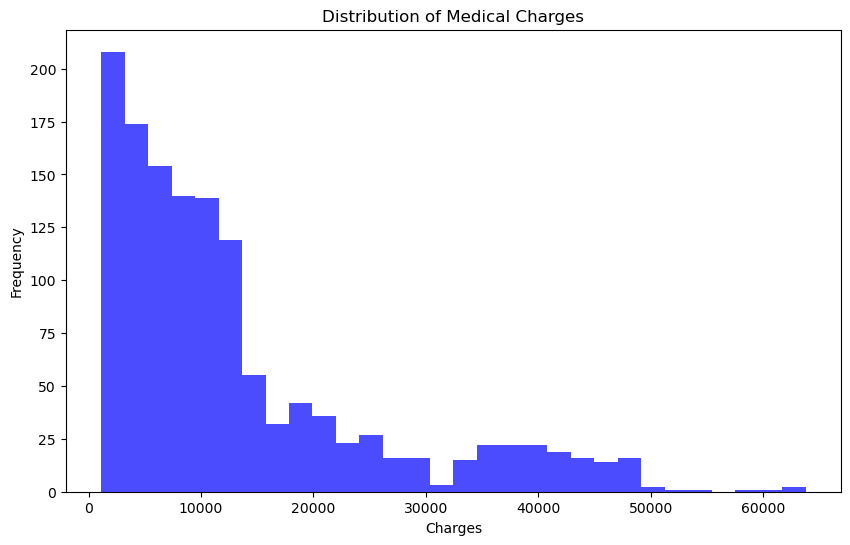

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


In [13]:
mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'])
# Display the calculated statistics
print(f'Mean Charges: ${mean_charges:.2f}')
print(f'Standard Deviation of Charges: ${std_charges:.2f}')

Mean Charges: $13270.42
Standard Deviation of Charges: $12105.48


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [15]:
#In this case, since the administrator is concerned that the actual average charge has fallen below $12,000, a one-sided
#interval would be relevant

#The critical value for a 95% one-sided confidence interval can be obtained from the t-distribution. 
#You would use a t-distribution because we are dealing with sample data and do not know the population standard deviation.

In [16]:
# Degrees of freedom (n-1 for a one-sample t-test)
df = len(medical['charges']) - 1

# Significance level (alpha)
alpha = 0.05

# Calculate the critical value
t_critical = t.ppf(1 - alpha, df)

# Calculate the margin of error
margin_of_error = t_critical * (np.std(medical['charges'], ddof=1) / np.sqrt(len(medical['charges'])))

# Calculate the lower one-sided confidence interval
lower_conf_interval = np.mean(medical['charges']) - margin_of_error

# Display the results
print(f'Critical Value: {t_critical:.3f}')
print(f'Margin of Error: {margin_of_error:.2f}')
print(f'95% Lower One-Sided Confidence Interval: (${lower_conf_interval:.2f}, ∞)')

Critical Value: 1.646
Margin of Error: 544.94
95% Lower One-Sided Confidence Interval: ($12725.49, ∞)


In [20]:
'''The 95% lower one-sided confidence interval suggests that, with 95% confidence, the true mean charge is at least the lower limit of the interval. If the lower limit is above $12,000, then there is evidence that the average charge is not below $12,000. If the lower limit is below $12,000, it supports the administrator's concern.Evaluate the results and compare the lower limit to $12,000 to determine whether the administrator should be concerned. Adjustments to the significance level or additional information might also influence the interpretation.'''

"The 95% lower one-sided confidence interval suggests that, with 95% confidence, the true mean charge is at least the lower limit of the interval. If the lower limit is above $12,000, then there is evidence that the average charge is not below $12,000. If the lower limit is below $12,000, it supports the administrator's concern.Evaluate the results and compare the lower limit to $12,000 to determine whether the administrator should be concerned. Adjustments to the significance level or additional information might also influence the interpretation."

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

In [22]:
#H0 = the mean charges for people with insurance are equal to the mean charges for people without insurance
#H1 = the mean charges for people with insurance are not equal to the mean charges for people without insurance
#The assumption about the variances of the two groups that we are making here is that the variances are equal
from scipy.stats import ttest_ind

# Separate the data into two groups: insured and uninsured
insured_charges = medical[medical['insuranceclaim'] == 1]['charges']
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges']

# Perform a two-sample t-test with equal variances assumption
t_stat_insurance, p_value_insurance = ttest_ind(insured_charges, uninsured_charges, equal_var=True)

# Display the results
print(f'T-Statistic: {t_stat_insurance:.2f}')
print(f'P-Value: {p_value_insurance:.4f}')

T-Statistic: 11.89
P-Value: 0.0000


__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [23]:
# Manual calculation of the t-test for the difference between means

# Sample sizes and means
n_insured = len(insured_charges)
n_uninsured = len(uninsured_charges)

mean_insured = np.mean(insured_charges)
mean_uninsured = np.mean(uninsured_charges)

# Standard deviations
std_insured = np.std(insured_charges, ddof=1)
std_uninsured = np.std(uninsured_charges, ddof=1)

# Pooled standard deviation
sp = np.sqrt(((n_insured - 1) * std_insured**2 + (n_uninsured - 1) * std_uninsured**2) / (n_insured + n_uninsured - 2))

# T-test statistic
t_stat_manual = (mean_insured - mean_uninsured) / (sp * np.sqrt(1/n_insured + 1/n_uninsured))

# Degrees of freedom
df_manual = n_insured + n_uninsured - 2

# Two-sided p-value
p_value_manual = 2 * (1 - t.cdf(np.abs(t_stat_manual), df_manual))

# Display the manual results
print(f'Manual T-Statistic: {t_stat_manual:.2f}')
print(f'Manual P-Value: {p_value_manual:.4f}')

Manual T-Statistic: 11.89
Manual P-Value: 0.0000


In [24]:
# Using scipy.stats.ttest_ind
t_stat_scipy, p_value_scipy = ttest_ind(insured_charges, uninsured_charges, equal_var=True)

# Display the scipy.stats results
print(f'Scipy T-Statistic: {t_stat_scipy:.2f}')
print(f'Scipy P-Value: {p_value_scipy:.4f}')

Scipy T-Statistic: 11.89
Scipy P-Value: 0.0000


In [25]:
# Verify results
print(f'Test Statistic Match: {np.isclose(t_stat_manual, t_stat_scipy)}')
print(f'P-Value Match: {np.isclose(p_value_manual, p_value_scipy)}')

Test Statistic Match: True
P-Value Match: True


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test